In [3]:
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=60
from imblearn import under_sampling

In [161]:
#%%writefile myfunctions.py
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from tinydb import TinyDB, Query

def cols_types(df:pd.DataFrame):
    df['Month']=[datetime.strftime(df['FlightDate'][i],'%m') for i in df.index]
    df['DayOfWeek']=[datetime.strftime(df['FlightDate'][i],'%u') for i in df.index]
    df['DayOfMonth']=[datetime.strftime(df['FlightDate'][i],'%d') for i in df.index]
    df['CRSDepTime']=df['CRSDepTime'].apply(lambda x: convert_to_min(x))
    df['CRSArrTime']=df['CRSArrTime'].apply(lambda x: convert_to_min(x))
    df['Flight_Number_Marketing_Airline']=df['Flight_Number_Marketing_Airline'].astype('object')
    df['Flight_Number_Operating_Airline']=df['Flight_Number_Operating_Airline'].astype('object')
    return df

def convert_to_min(x):
    if x<10:
        string= '00:0'+str(x)
    elif x<60:
        string= '00:'+str(x)
    elif x<960:
        string= '0'+str(x)[0]+':'+str(x)[1:]
    else:
        string=str(x)[0:2]+':'+str(x)[2:]
    dt=datetime.strptime(string,'%H:%M')+timedelta(days=25569)
    return dt.timestamp()


def create_db(df):
    db=TinyDB('db.json')
    for i in len(df):
        db.insert({c:df[c][i] for c in df.columns})

def outcome(df):
    if df['Cancelled']:
        return 'Cancelled'
    if df['ArrDelayMinutes']>0:
        return 'Delayed'
    if df['Diverted']:
        return 'Diverted'
    return 'OK'

def filtered(df):
    thresh=max(df['FlightDate'])
    df=df[thresh<(df['FlightDate']+pd.Timedelta(days=730))]
    return df[~df['Diverted']]

def add_marketing(df):
    companies=df.groupby(['IATA_Code_Operating_Airline','Airline']).agg('count').reset_index()
    return {companies['IATA_Code_Operating_Airline'][i]:companies['Airline'][i] for i in range(len(companies))}

def clean(df):
    if df['FlightDate'].dtype=='object':
        df['FlightDate']=pd.to_datetime(df['FlightDate'])
    df=filtered(df)
    df['result']=df.apply(lambda x: outcome(x), axis=1)
    df=cols_types(df)
    df=df[['Month','DayofMonth','DayOfWeek','Origin', 'Dest','IATA_Code_Marketing_Airline','IATA_Code_Operating_Airline','Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','ArrDelayMinutes','Distance','CRSDepTime','CRSArrTime','result']] 
    return df

In [116]:
int('235',6)

95

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [26]:
[i for i in df2['DOT_ID_Operating_Airline'].unique() if i not in df2['DOT_ID_Marketing_Airline'].unique()]

[19687,
 20304,
 20452,
 20363,
 20398,
 20397,
 20445,
 20378,
 20427,
 20500,
 20046,
 20263]

In [162]:
df2=pd.read_csv('../Data/Raw/sample.csv')
df2=clean(df2)
# df2.info()
df2['CRSDepTime'].unique()

array([229500., 198300., 243600., ..., 181140., 176760., 175620.])

In [120]:
df2['CRSArrTime']
pd.to_datetime()

0         1748
1          920
2         2116
3         1225
4         1959
          ... 
103896     843
103897    1632
103898    1945
103899    1040
103900    2014
Name: CRSArrTime, Length: 103901, dtype: int64

In [51]:
df2.groupby(['IATA_Code_Marketing_Airline']).agg('count').index

Index(['AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'NK', 'UA', 'WN'], dtype='object', name='IATA_Code_Marketing_Airline')

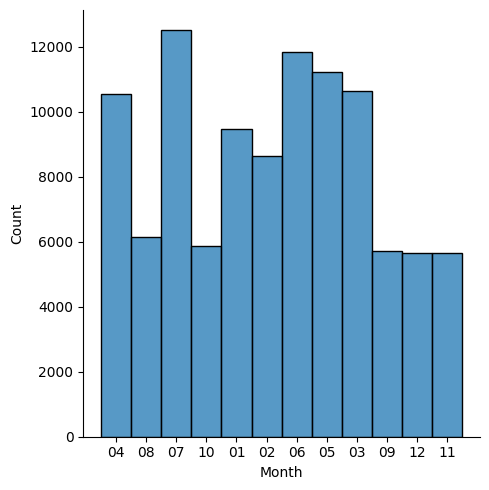

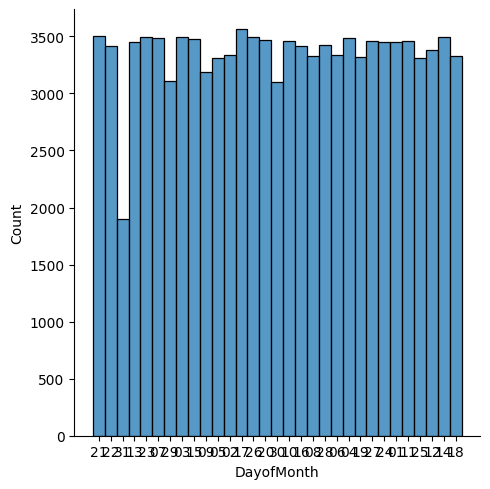

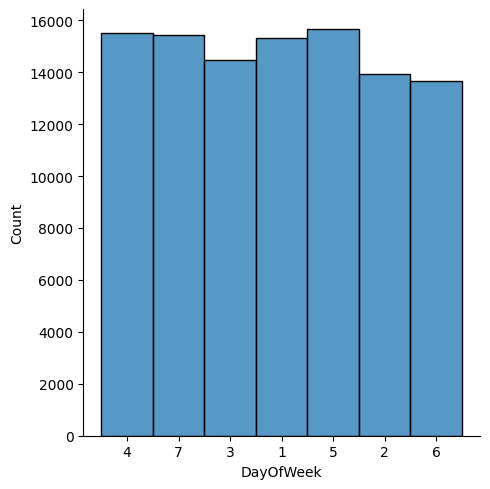

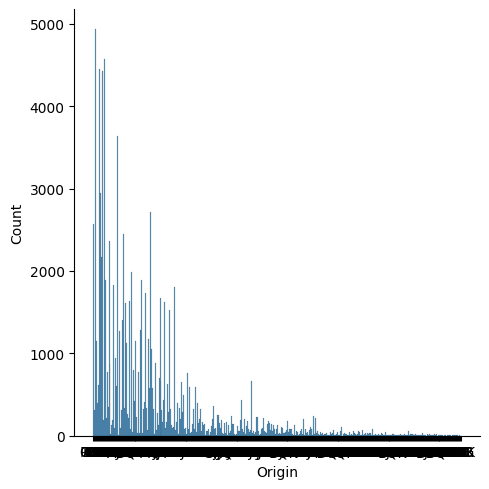

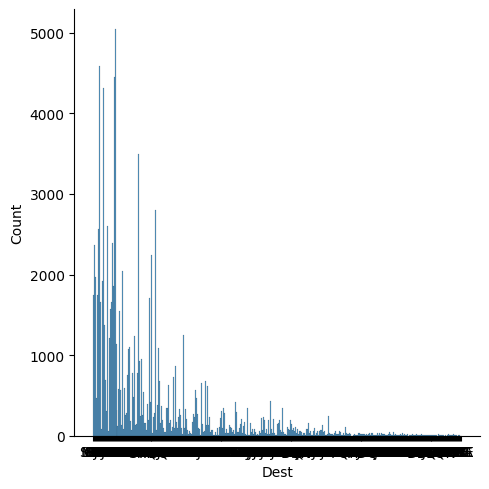

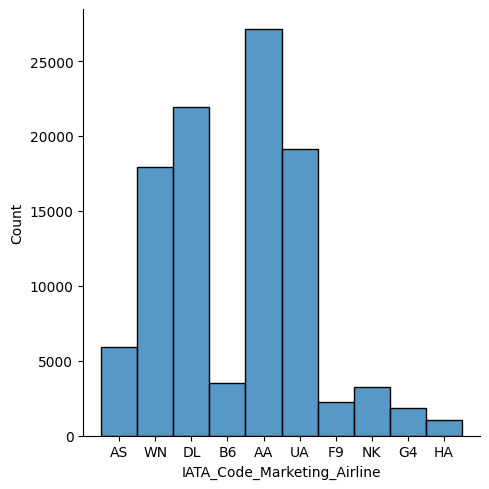

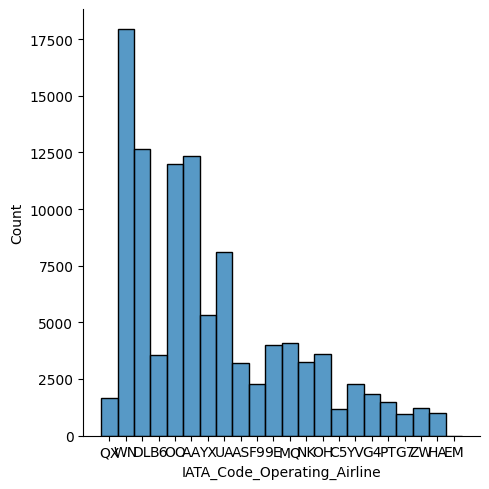

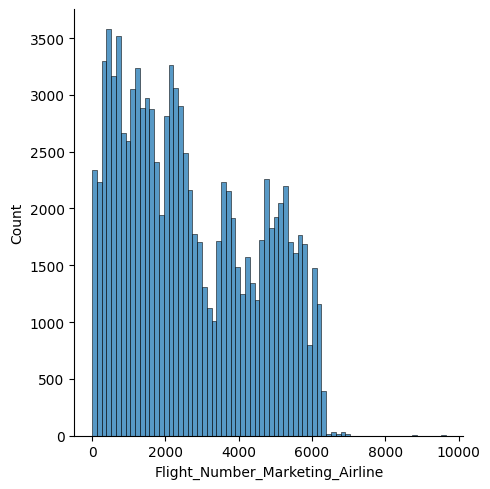

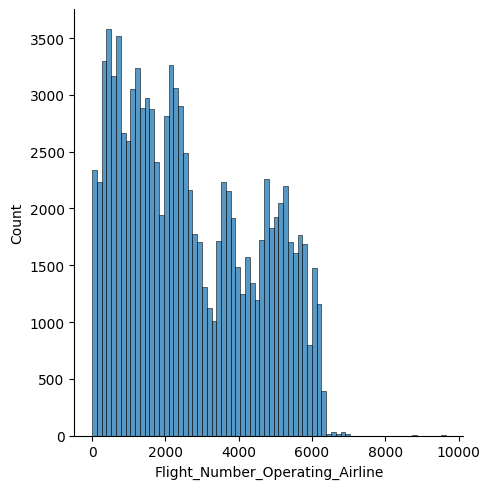

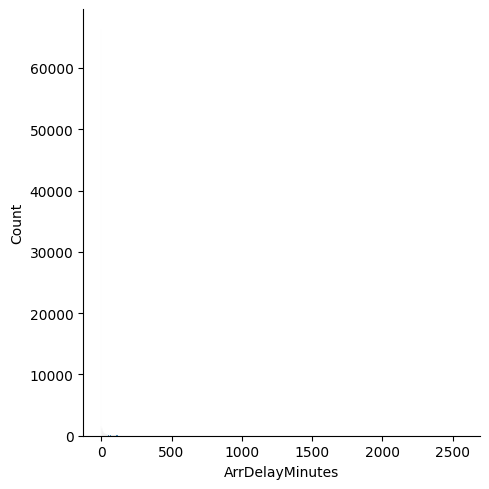

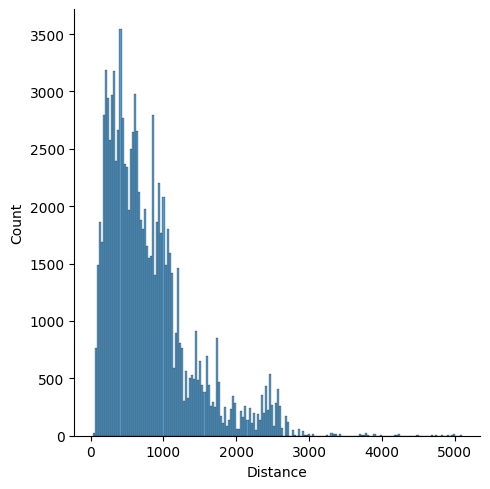

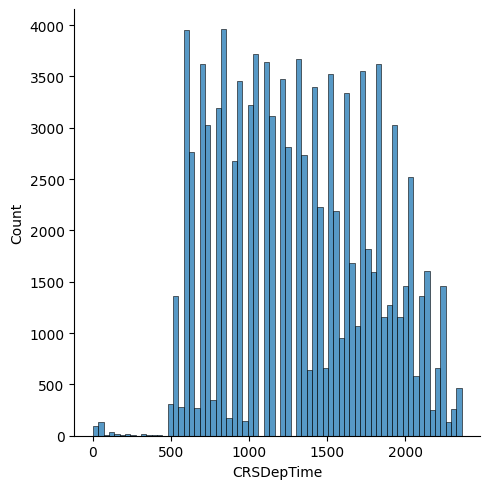

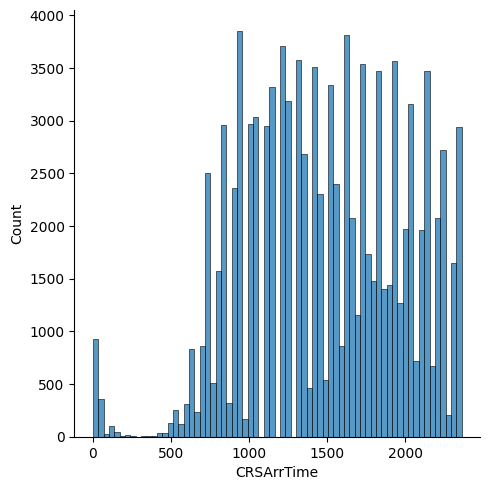

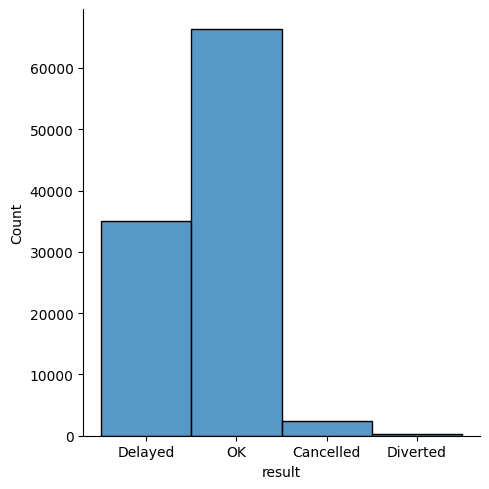

In [88]:
for i in df2.columns:
    sns.displot(df2[i])
    plt.show()

result
OK           66304
Delayed      34953
Cancelled     2372
Diverted       272
Name: count, dtype: int64

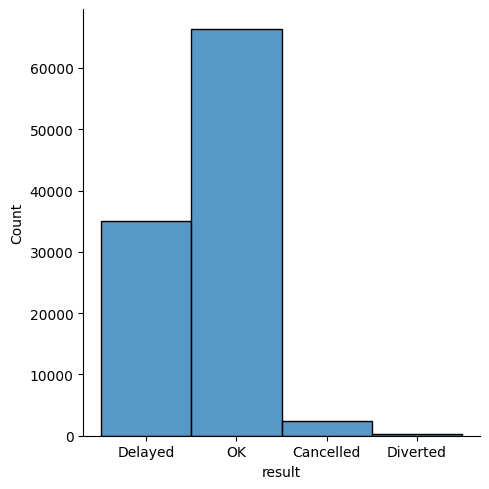

In [60]:
sns.displot(df2['result']);
display(df2['result'].value_counts())

In [9]:
df2['result']=df2.apply(lambda x: outcome(x), axis=1)

In [10]:
test=['FlightDate', 'Origin', 'Dest','DOT_ID_Marketing_Airline','DOT_ID_Operating_Airline','Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','ArrDelayMinutes','Distance','DepTimeBlk','ArrTimeBlk','result']

In [11]:
[i for i in test if i not in data.columns]

[]

In [21]:
len(nans.OriginWac.unique())

51